In [1]:
import pandas as pd
import numpy as np

In [2]:
def load_xls_to_pandas(filepath , sheet_name):
    xls = pd.ExcelFile(filepath)
    df = pd.read_excel(xls, sheet_name)
    df.columns = df.iloc[1]
    # remove row 1 and 2
    df = df.iloc[2:]
    return df

df_raw = load_xls_to_pandas('data/hp_retro_data.xls', 'Discretized Data (Final)')
df_raw.head(10)

1,NUMBER,SEX,TEMP,HEART_RATE,AGE,PREV_VISIT,HX_TRAUMA,COMPLAINT_SITE,HX_ILLNESS,GAIT_REPORTED,...,GAIT_OBSERVED,PAIN_ROM_HIP,OTHER_PAIN_SITE,PAIN_PALPATION,SWELLING,CURRENT_ILLNESS,PREV_PROBLEMS,WBC,ESR,TRIAGE
2,1,FEMALE,?,GE80_LT120,GE6Y,?,NO,HIP,NO,NOT_WT_BEAR,...,?,YES,?,TENDER,NO,NO,NO,?,?,DISCHARGE
3,3,FEMALE,LT38,GE120,LT6Y,?,NO,LEG,NO,?,...,?,YES,NO,?,?,NO,NO,?,?,DISCHARGE
4,4,MALE,LT38,?,GE6Y,?,?,HIP,NO,?,...,LIMP,YES,NO,?,NO,YES,?,?,?,DISCHARGE
5,5,MALE,LT38,GE80_LT120,GE6Y,?,YES,HIP,?,?,...,NORMAL,YES,?,NORMAL,NO,NO,?,?,?,DISCHARGE
6,7,FEMALE,?,GE80_LT120,GE6Y,?,YES,HIP,?,?,...,NOT_WT_BEAR,?,LEG,?,NO,?,NO,?,?,DISCHARGE
7,8,FEMALE,LT38,GE80_LT120,GE6Y,?,NO,HIP,NO,NORMAL,...,NORMAL,YES,NO,NORMAL,?,NO,?,?,?,DISCHARGE
8,10,MALE,LT38,GE80_LT120,GE6Y,YES,NO,HIP,YES,NOT_WT_BEAR,...,?,YES,?,TENDER,NO,YES,YES,?,?,DISCHARGE
9,11,MALE,LT38,GE40_LT80,GE6Y,?,YES,HIP,NO,LIMP,...,?,NO,PELVIS,NORMAL,NO,NO,NO,?,?,DISCHARGE
10,14,MALE,LT38,GE80_LT120,GE6Y,YES,?,HIP,NO,LIMP,...,?,?,?,?,?,?,?,?,?,DISCHARGE
11,15,MALE,LT38,GE80_LT120,GE6Y,?,YES,HIP,NO,?,...,?,YES,?,TENDER,NO,NO,YES,?,?,DISCHARGE


In [22]:
# num_cols = ["TEMP", "HEART_RATE", "AGE", "DURATION", "WBC", "ESR"]
# cat_cols = ["SEX", "PREV_VISIT", "HX_TRAUMA", "COMPLAINT_SITE", "HX_ILLNESS",
#             "GAIT_REPORTED", "APPEARANCE", "HIP_REST", "HIP_ROM", "HIP_INT_ROT",
#             "HIP_INT_ROT", "HIP_FLEXION", "GAIT_OBSERVED", "PAIN_ROM_HIP", "OTHER_PAIN_SITE",
#             "PAIN_PALPATION", "SWELLING", "CURRENT_ILLNESS", "PREV_PROBLEMS"]

cat_bins = {
        "TRIAGE": {"DISCHARGE": 0, "XRAY": 0, "LAB_XRAY_BSCAN": 1},
        "OTHER_PAIN_SITE": {np.nan: 0, 'NO': 1, 'OTHER': 2,
                            'PELVIS': 3,'BACK': 4, 'LEG': 5},
        }

def preproc_df(df):
    df = df.replace('?', np.nan)
    print(df.isnull().sum())

    # df = df.dropna(axis=1, thresh=200)
    
    # create maps for all variables
    for col in set(df.columns) - set(["NUMBER", "TRIAGE"]):
        if col not in cat_bins:
            if np.nan in list(df[col].unique()):
                vals = [np.nan] + list(set(df[col].unique()) - {np.nan})
            else:
                vals = list(set(df[col].unique()))
            cat_bins[col] = {k: v for v, k in enumerate(vals)}

    # map categorical variables using cat_bins
    for col in df.columns:
        if col in cat_bins:
            df[col] = df[col].map(cat_bins[col])

    # encode categorical variables
    # print number of different variables in categorical columns

    # encode nans as a new category
    return df

df = preproc_df(df_raw.copy(deep=True))
df.head(10)

1
NUMBER               0
SEX                  0
TEMP                80
HEART_RATE          27
AGE                  0
PREV_VISIT         279
HX_TRAUMA           94
COMPLAINT_SITE       7
HX_ILLNESS          45
GAIT_REPORTED       56
DURATION            11
APPEARANCE          79
HIP_REST           339
HIP_ROM             37
HIP_INT_ROT         71
HIP_FLEXION         81
GAIT_OBSERVED      122
PAIN_ROM_HIP        80
OTHER_PAIN_SITE    119
PAIN_PALPATION     120
SWELLING           150
CURRENT_ILLNESS     51
PREV_PROBLEMS      122
WBC                241
ESR                250
TRIAGE               0
dtype: int64


/tmp/ipykernel_39234/3207066851.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('?', np.nan)


1,NUMBER,SEX,TEMP,HEART_RATE,AGE,PREV_VISIT,HX_TRAUMA,COMPLAINT_SITE,HX_ILLNESS,GAIT_REPORTED,...,GAIT_OBSERVED,PAIN_ROM_HIP,OTHER_PAIN_SITE,PAIN_PALPATION,SWELLING,CURRENT_ILLNESS,PREV_PROBLEMS,WBC,ESR,TRIAGE
2,1,1,0,3,1,0,1,2,1,2,...,0,2,0,1,1,1,1,0,0,0
3,3,1,1,1,0,0,1,3,1,0,...,0,2,1,0,0,1,1,0,0,0
4,4,0,1,0,1,0,0,2,1,0,...,1,2,1,0,1,2,0,0,0,0
5,5,0,1,3,1,0,2,2,0,0,...,3,2,0,2,1,1,0,0,0,0
6,7,1,0,3,1,0,2,2,0,0,...,2,0,5,0,1,0,1,0,0,0
7,8,1,1,3,1,0,1,2,1,3,...,3,2,1,2,0,1,0,0,0,0
8,10,0,1,3,1,2,1,2,2,2,...,0,2,0,1,1,2,2,0,0,0
9,11,0,1,2,1,0,2,2,1,1,...,0,1,3,2,1,1,1,0,0,0
10,14,0,1,3,1,2,0,2,1,1,...,0,0,0,0,0,0,0,0,0,0
11,15,0,1,3,1,0,2,2,1,0,...,0,2,0,1,1,1,2,0,0,0


In [23]:
# count unique in TRIAGE
triage_counts = df['TRIAGE'].value_counts()
print(triage_counts)
print("Percent of lab_xray_bscan:")
print(triage_counts[1] / triage_counts.sum())

TRIAGE
0    366
1     46
Name: count, dtype: int64
Percent of lab_xray_bscan:
0.11165048543689321


In [24]:
df.describe()

1,NUMBER,SEX,TEMP,HEART_RATE,AGE,PREV_VISIT,HX_TRAUMA,COMPLAINT_SITE,HX_ILLNESS,GAIT_REPORTED,...,GAIT_OBSERVED,PAIN_ROM_HIP,OTHER_PAIN_SITE,PAIN_PALPATION,SWELLING,CURRENT_ILLNESS,PREV_PROBLEMS,WBC,ESR,TRIAGE
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,...,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,207.410194,0.351942,0.915049,2.317961,0.432039,0.609223,0.929612,2.434466,1.116505,1.320388,...,1.242718,1.242718,1.228155,1.148058,0.645631,1.167476,0.803398,0.757282,0.771845,0.111650
std,119.220417,0.478157,0.544887,1.005275,0.495962,0.901587,0.617976,0.618511,0.567591,0.737769,...,1.071334,0.757329,1.443631,0.842844,0.498812,0.622850,0.598203,0.963732,1.030618,0.315319
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,104.750000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,207.500000,0.000000,1.000000,3.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,310.250000,1.000000,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,1.000000,2.000000,...,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.000000
max,413.000000,1.000000,2.000000,3.000000,1.000000,2.000000,2.000000,4.000000,2.000000,3.000000,...,3.000000,2.000000,5.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,1.000000


In [64]:
print(df.shape)

(412, 26)


## Split, supersample, encode (one-hot)

In [67]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

X = df.drop(columns=['NUMBER', 'TRIAGE'])
y = df['TRIAGE']

print('Original dataset shape %s' % Counter(y))


Original dataset shape Counter({0: 366, 1: 46})


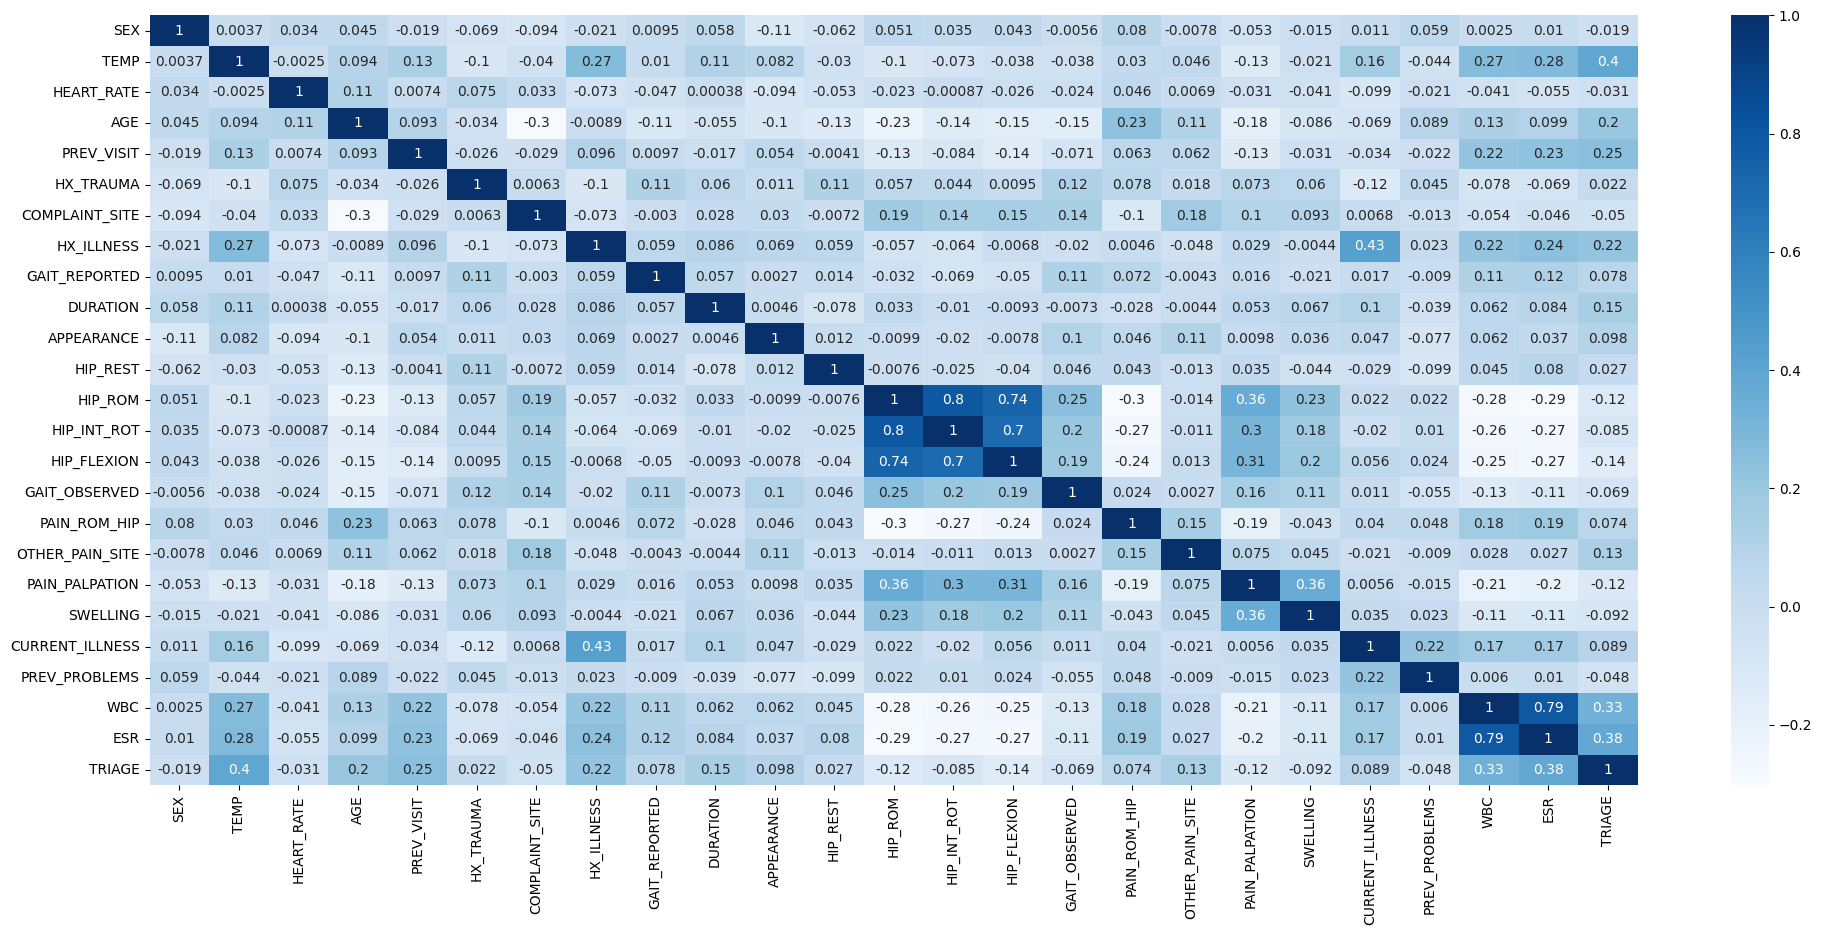

In [68]:
def show_correlations(df: pd.DataFrame) -> None:
    plt.figure(figsize=(24, 10))
    correlation_matrix = df.corr(method="kendall")
    sns.heatmap(correlation_matrix, annot=True, cmap="Blues")


show_correlations(pd.concat([X, y], axis=1))

In [69]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Train and test datasets shape %s' % Counter(y_train), Counter(y_test))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))


encoder = OneHotEncoder()
X, y = encoder.fit_transform(X.values), y.values
X_train, X_res, X_test  = encoder.transform(X_train.values), encoder.transform(X_res.values), encoder.transform(X_test.values)
y_train, y_res, y_test = y_train.values, y_res.values, y_test.values


print(X.shape, X_train.shape, X_res.shape, X_test.shape)


Train and test datasets shape Counter({0: 292, 1: 37}) Counter({0: 74, 1: 9})
Resampled dataset shape Counter({0: 292, 1: 292})
(412, 84) (329, 84) (584, 84) (83, 84)


## Model

### baseline model - logistic regression

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc 
import matplotlib.pyplot as plt

def auprc_score(y: np.ndarray, y_pred: np.ndarray) -> float:
    precision, recall, _ = precision_recall_curve(y, y_pred)
    return auc(recall, precision)

# Create a RandomForestClassifier instance

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

kfold_results = []
for train_index, val_index in kf.split(X_res):
    classifier = LogisticRegression(random_state=42, max_iter=1000)
    result = {}
    X_res_train, X_res_val = X_res[train_index], X_res[val_index]
    y_res_train, y_res_val = y_res[train_index], y_res[val_index]
    classifier.fit(X_res_train, y_res_train)
    y_pred = classifier.predict(X_res_val)
    
    result['roc_auc'] = roc_auc_score(y_res_val, y_pred)
    result['auprc'] = auprc_score(y_res_val, y_pred)
    result['conf_matrix'] = confusion_matrix(y_res_val, y_pred)
    result['model'] = classifier
    kfold_results.append(result)


baseline_model = max(kfold_results, key=lambda x: x['roc_auc'])

print("Best model roc_auc: ", baseline_model['roc_auc'], "auprc: ", baseline_model['auprc'])
print("Best model conf matrix on val data: \n", baseline_model['conf_matrix'])

y_pred = baseline_model['model'].predict(X)
conf = confusion_matrix(y, y_pred)
print("Conf matrix on all data: \n", conf)

y_pred = baseline_model['model'].predict(X_test)
conf = confusion_matrix(y_test, y_pred)
print("\nTest data for baseline_model:")
print("Conf matrix: \n", conf,
      "\n  roc_auc: ", roc_auc_score(y_test, y_pred),
      "\n  auprc: ", auprc_score(y_test, y_pred),
      "\n  prec: ", conf[1, 1] / (conf[1, 1] + conf[0, 1]),
      "\n  recall: ", conf[1, 1] / (conf[1, 1] + conf[1, 0]),
      "\n  specificity: ", conf[0, 0] / (conf[0, 0] + conf[0, 1])
      )




Best model roc_auc:  0.9497354497354498 auprc:  0.9689545427250346
Best model conf matrix on val data: 
 [[52  2]
 [ 4 59]]
Conf matrix on all data: 
 [[354  12]
 [ 12  34]]

Test data for baseline_model:
Conf matrix: 
 [[71  3]
 [ 6  3]] 
  roc_auc:  0.6463963963963963 
  auprc:  0.4528112449799197 
  prec:  0.5 
  recall:  0.3333333333333333 
  specificity:  0.9594594594594594


## Grid search on different models

Grid search for random_forest
Fitting 25 folds for each of 24 candidates, totalling 600 fits
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 800}
0.9827322195126866

Test data for random_forest:

  roc_auc:  0.8483483483483483 
  auprc:  0.6701678508907425 
  prec:  0.5384615384615384 
  recall:  0.7777777777777778 
  specificity:  0.918918918918919
Grid search for gradient_boost
Fitting 25 folds for each of 24 candidates, totalling 600 fits
{'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 500}
0.9930923638122493

Test data for gradient_boost:

  roc_auc:  0.6884384384384384 
  auprc:  0.4745649263721553 
  prec:  0.4444444444444444 
  recall:  0.4444444444444444 
  specificity:  0.9324324324324325
Grid search for ada_boost
Fitting 25 folds for each of 9 candidates, totalling 225 fits


/home/alex/Repos/BIO/projekt-1/.venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/alex/Repos/BIO/projekt-1/.venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/alex/Repos/BIO/projekt-1/.venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/alex/Repos/BIO/projekt-1/.venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be remov

{'learning_rate': 0.1, 'n_estimators': 800}
0.9803599427638606

Test data for ada_boost:

  roc_auc:  0.6396396396396397 
  auprc:  0.41709695926563395 
  prec:  0.42857142857142855 
  recall:  0.3333333333333333 
  specificity:  0.9459459459459459
Grid search for svc
Fitting 25 folds for each of 12 candidates, totalling 300 fits
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.9971011104617183

Test data for svc:

  roc_auc:  0.6396396396396397 
  auprc:  0.41709695926563395 
  prec:  0.42857142857142855 
  recall:  0.3333333333333333 
  specificity:  0.9459459459459459
Grid search for mlp
Fitting 25 folds for each of 6 candidates, totalling 150 fits
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}
0.9919698099518331

Test data for mlp:

  roc_auc:  0.6396396396396397 
  auprc:  0.41709695926563395 
  prec:  0.42857142857142855 
  recall:  0.3333333333333333 
  specificity:  0.9459459459459459


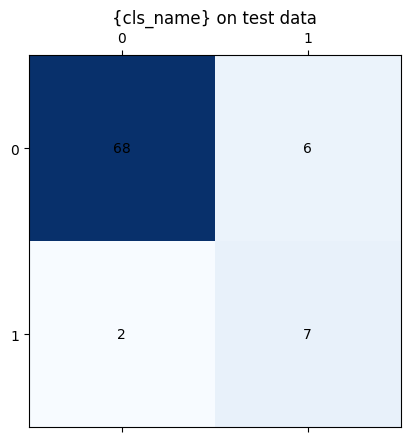

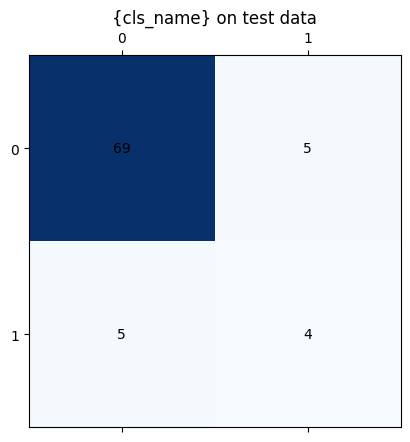

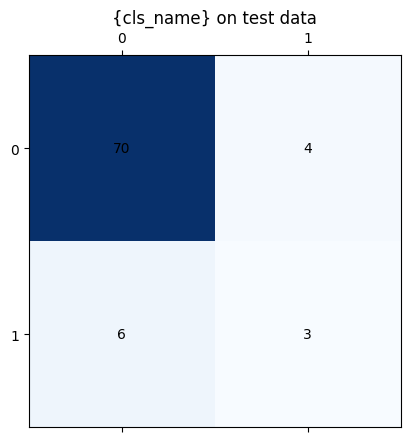

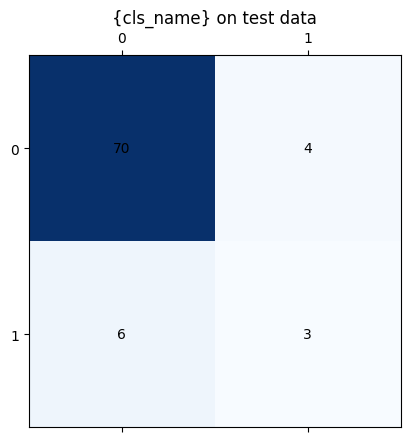

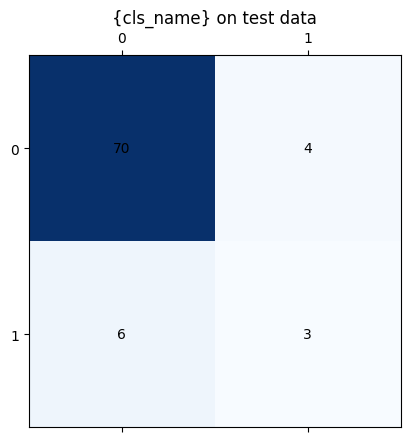

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

classifiers = { 
    'random_forest': RandomForestClassifier(random_state=42),
    'gradient_boost': GradientBoostingClassifier(random_state=42),
    'ada_boost': AdaBoostClassifier(random_state=42),
    'svc': SVC(random_state=42),
    'mlp': MLPClassifier(random_state=42)
}

param_grids = {
    'random_forest': {
        'n_estimators': [200, 500, 800],
        'max_depth': [2, 5],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [4, 6]
    },
    'gradient_boost': {
        'n_estimators': [200, 500, 800],
        'max_depth': [2, 5],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [4, 6]
    },
    'ada_boost': {
        'n_estimators': [250, 500, 800],
        'learning_rate': [1, 0.1, 0.01]
    },
    'svc': {
        'C': [0.1, 1, 10],
        'gamma': [0.1, 0.01],
        'kernel': ['rbf', 'sigmoid']
    },
    'mlp': {
        'hidden_layer_sizes': [(50, 50), (100, 100)],
        'activation': ['relu'],
        'solver': ['adam'],
        'alpha': [0.0005, 0.0001, 0.00005]
    }

}


# Instantiate a GridSearchCV classifier with 5-fold cross-validation
# and record the AUPRC and AUROC scores

kf = RepeatedStratifiedKFold(n_splits=k_folds, n_repeats=5, random_state=42)

models = {k: None for k in classifiers.keys()}

for cls_name, cls in classifiers.items():
    print(f"Grid search for {cls_name}")
    grid_search = GridSearchCV(estimator=cls, param_grid=param_grids[cls_name],
                                cv=kf, scoring='roc_auc', verbose=1,
                                n_jobs=-1, return_train_score=True)

    # Fit the grid search to the data
    grid_search.fit(X_res, y_res)
    print(grid_search.best_params_)
    print(grid_search.best_score_)

    y_pred = grid_search.predict(X_test)

    conf = confusion_matrix(y_test, y_pred)
    plt.matshow(conf, cmap='Blues')
    plt.title("{cls_name} on test data")
    for (i, j), val in np.ndenumerate(conf):
        plt.text(j, i, f'{val:.0f}', ha='center', va='center')

    print(f"\nTest data for {cls_name}:")
    print("\n  roc_auc: ", roc_auc_score(y_test, y_pred),
        "\n  auprc: ", auprc_score(y_test, y_pred),
        "\n  prec: ", conf[1, 1] / (conf[1, 1] + conf[0, 1]),
        "\n  recall: ", conf[1, 1] / (conf[1, 1] + conf[1, 0]),
        "\n  specificity: ", conf[0, 0] / (conf[0, 0] + conf[0, 1]))
    
    models[cls_name] = grid_search.best_estimator_
    

In [60]:
import pickle

best_result = models['random_forest']

# save best 
filename = 'best_model.sav'
pickle.dump(best_result, open(filename, 'wb'))

In [71]:
y_pred = best_result.predict(X)
conf_all = confusion_matrix(y, y_pred)
print("Conf matrix on all data: \n", conf_all)

y_pred = best_result.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
print("\nTest data on best_model:")
print("Conf matrix: \n", conf,
      "\n  roc_auc: ", roc_auc_score(y_test, y_pred),
      "\n  auprc: ", auprc_score(y_test, y_pred),
      "\n  prec: ", conf[1, 1] / (conf[1, 1] + conf[0, 1]),
      "\n  recall: ", conf[1, 1] / (conf[1, 1] + conf[1, 0]),
      "\n  specificity: ", conf[0, 0] / (conf[0, 0] + conf[0, 1])
      )

Conf matrix on all data: 
 [[338  28]
 [  3  43]]

Test data on best_model:
Conf matrix: 
 [[68  6]
 [ 2  7]] 
  roc_auc:  0.8483483483483483 
  auprc:  0.6701678508907425 
  prec:  0.5384615384615384 
  recall:  0.7777777777777778 
  specificity:  0.918918918918919


In [ ]:
baseline_model = baseline_model['model']

In [92]:
def calculate_risk_thresholds(y: np.ndarray, y_pred: np.ndarray) -> tuple[float, float]:
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    sensitivity, specificity = tpr, 1 - fpr

    medium_risk = (
        thresholds[np.where(sensitivity >= 0.99)[0][0]] if np.any(sensitivity >= 0.99) else None
    )
    high_risk = (
        thresholds[np.where(specificity >= 0.90)[0][-1]] if np.any(specificity >= 0.90) else None
    )
    return medium_risk, high_risk

def make_prediction(y_pred_proba: np.ndarray, medium_risk: float, high_risk: float) -> np.ndarray:
    return np.array(
        [
            False if response < medium_risk else True if response >= high_risk else np.nan
            for response in y_pred_proba
        ]
    )

def calculate_rates(y: np.ndarray, y_pred: np.ndarray) -> tuple[float, float, float, float]:
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    # positives, negatives = tp + fn, tn + fp

    tpr = tp / (tp + fn)  # sensitivity
    fnr = fn / (fn + tp)  # miss_rate
    fpr = fp / (fp + tn)  # fall_out
    tnr = tn / (tn + fp)  # specificity

    return tpr, fnr, fpr, tnr

# assess both the baseline and best model over folds of train data
kfold_results = {}

for model_name, model in [('base', baseline_model), ('best', best_result)]:
    auprc, auroc = [], []
    negatives, positives, unknowns = [], [], []
    rates = []
    for train_index, val_index in kf.split(X_res):
        result = {}
        X_res_train, X_res_val = X_res[train_index], X_res[val_index]
        y_res_train, y_res_val = y_res[train_index], y_res[val_index]

        y_pred = model.predict(X_res_val)
        auprc.append(auprc_score(y_res_val, y_pred))
        auroc.append(roc_auc_score(y_res_val, y_pred))

        y_pred_proba_train = model.predict_proba(X_res_train)[:, 1]
        medium_risk, high_risk = calculate_risk_thresholds(y_res_train, y_pred_proba_train)

        y_pred_proba = model.predict_proba(X_res_val)[:, 1]
        predicted = make_prediction(y_pred_proba, medium_risk, high_risk)        

        positive = np.sum(predicted == True)
        negative = np.sum(predicted == False)
        unknown = np.sum(np.isnan(predicted))

        number_of_samples: int = X_res_val.shape[0]
        negatives.append(negative / number_of_samples)
        positives.append(positive / number_of_samples)
        unknowns.append(unknown / number_of_samples)

        mask = ~np.isnan(predicted)
        rates.append(calculate_rates(y_res_val[mask], predicted[mask]))

    result = {
        "auprc": np.mean(auprc),
        "auroc": np.mean(auroc),
        "negatives": np.mean(negatives),
        "positives": np.mean(positives),
        "unknowns": np.mean(unknowns),
        "rates": np.mean(rates, axis=0),
    }
    kfold_results[model_name]=result


In [93]:
kfold_results

{'base': {'auprc': 0.9774831609497381,
  'auroc': 0.9693048062718,
  'negatives': 0.43485116416150893,
  'positives': 0.522295903330386,
  'unknowns': 0.04285293250810492,
  'rates': array([0.98696742, 0.01303258, 0.07087719, 0.92912281])},
 'best': {'auprc': 0.9650529768451996,
  'auroc': 0.9599512670565302,
  'negatives': 0.4725464190981432,
  'positives': 0.5274535809018567,
  'unknowns': 0.0,
  'rates': array([0.98992679, 0.01007321, 0.06604288, 0.93395712])}}

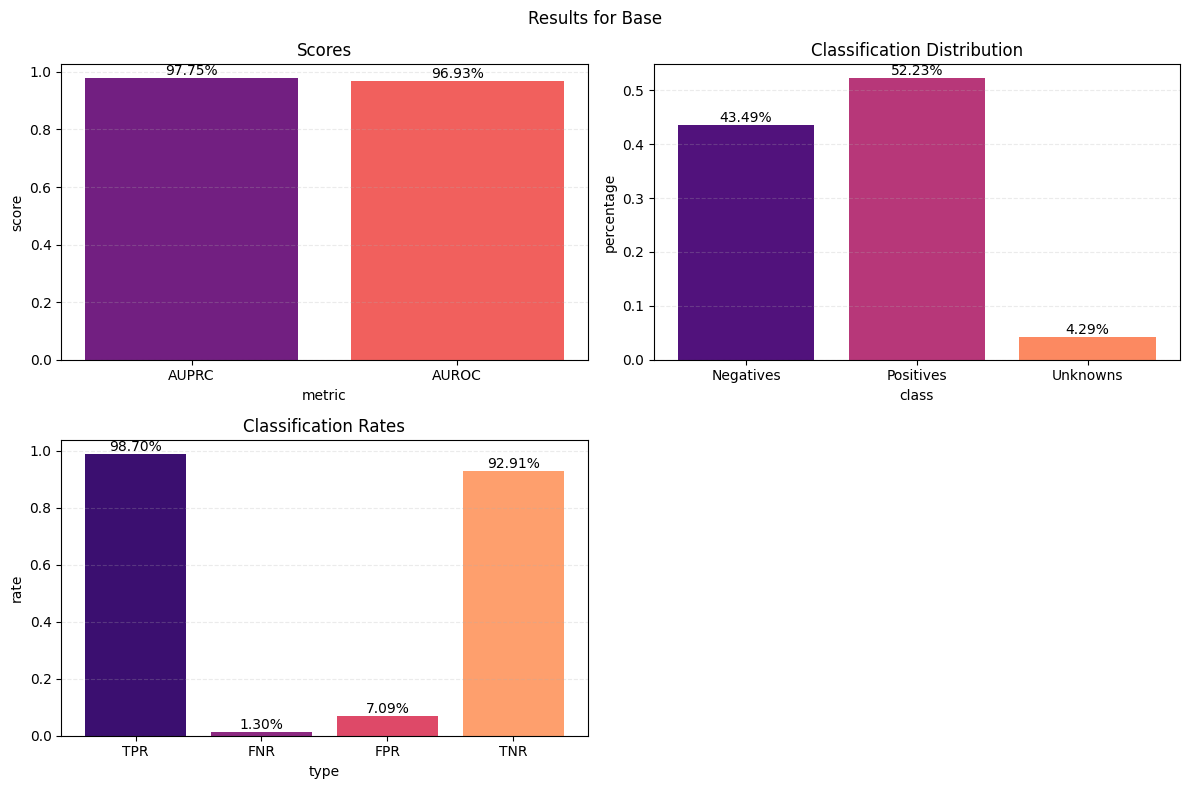

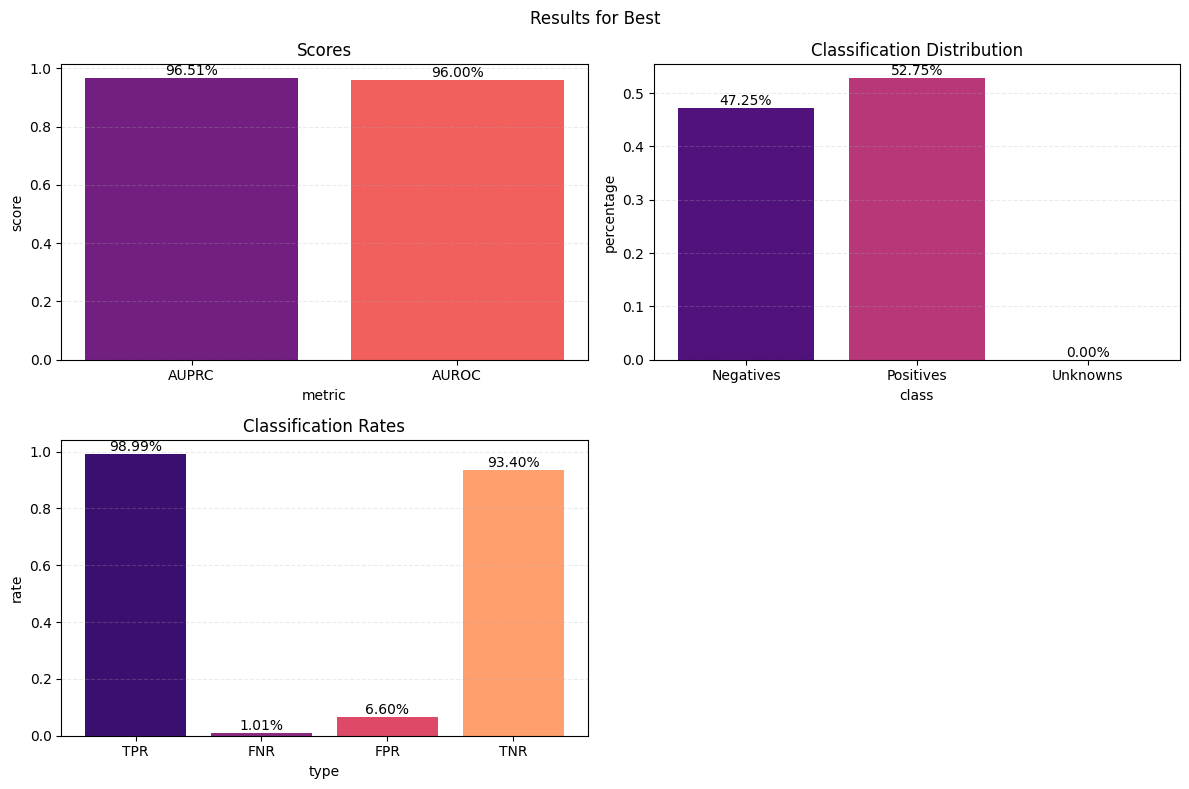

In [96]:
def show_result(result: dict, classifier: str) -> None:
    two_colors, three_colors, four_colors = [
        sns.color_palette("magma", number) for number in (2, 3, 4)
    ]
    fig, axs = plt.subplots(2, 2, figsize=(12, 8), tight_layout=True)
    ax1, ax2, ax3, ax4 = axs.flatten()

    ax1.bar(
        ["AUPRC", "AUROC"],
        [result["auprc"], result["auroc"]],
        color=two_colors,
    )
    ax1.grid(axis="y", linestyle="--", alpha=0.25)
    for i, value in enumerate([result["auprc"], result["auroc"]]):
        ax1.text(i, value, f"{value * 100:.2f}%", ha="center", va="bottom")
    ax1.set_xlabel("metric")
    ax1.set_ylabel("score")
    ax1.set_title("Scores")

    ax2.bar(
        ["Negatives", "Positives", "Unknowns"],
        [result["negatives"], result["positives"], result["unknowns"]],
        color=three_colors,
    )
    ax2.grid(axis="y", linestyle="--", alpha=0.25)
    for i, value in enumerate([result["negatives"], result["positives"], result["unknowns"]]):
        ax2.text(i, value, f"{value * 100:.2f}%", ha="center", va="bottom")
    ax2.set_xlabel("class")
    ax2.set_ylabel("percentage")
    ax2.set_title("Classification Distribution")

    ax3.bar(["TPR", "FNR", "FPR", "TNR"], result["rates"], color=four_colors)
    ax3.grid(axis="y", linestyle="--", alpha=0.25)
    for i, value in enumerate(result["rates"]):
        ax3.text(i, value, f"{value * 100:.2f}%", ha="center", va="bottom")
    ax3.set_xlabel("type")
    ax3.set_ylabel("rate")
    ax3.set_title("Classification Rates")

    # sns.heatmap(result["confusion_matrix"], annot=True, cmap="Blues", ax=ax4)
    # ax4.set_xticklabels(["Predicted 0", "Predicted 1"])
    # ax4.set_yticklabels(["Actual 0", "Actual 1"])
    # ax4.set_title("Confusion Matrix (mean)")
    ax4.axis("off")

    fig.suptitle(f"Results for {classifier.capitalize()}")
    fig.savefig(f"./resources/figures/hp_retro/{classifier}.png")
    plt.show()


for classifier, result in kfold_results.items():
    show_result(result, classifier)